# Test scaling

test scaling methods


In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

## function to genereate model

In [3]:
def create_model():
  ## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
  tf.random.set_seed(10)
  ## define and compile model
  # Define the model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  # Compile the model
  model.compile(optimizer=tf.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

## function to plot history

In [4]:
def plot_history(history):

  # summarize history for loss
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train'], loc='upper left')
  plt.show()


  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train'], loc='upper left')
  plt.show()


## divide by 255

In [5]:
# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values of the train and test images
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [6]:
print(x_test[1].max())
print(x_test[1].min())

1.0
0.0


setting seed

In [7]:
tf.random.set_seed(10)

In [8]:
model = create_model()

In [9]:
# Train the model 
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4723 - accuracy: 0.8328
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3592 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3235 - accuracy: 0.8793
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8903
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.8965


In [10]:
# Evaluate the model on unseen data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8794


[0.33885738253593445, 0.8794000148773193]

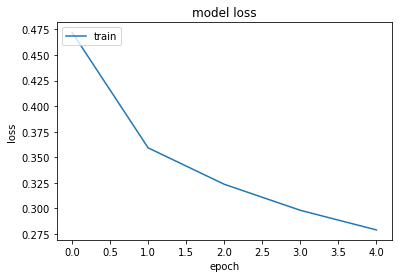

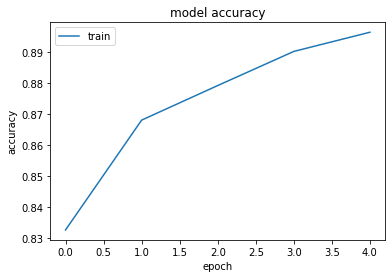

In [11]:
plot_history(history)

## Using standard Sclaer

In [12]:
# Reload the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

## using Standard Scaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = standard_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)


In [13]:
print(x_test[1].max())
print(x_test[1].min())

2.4276437016679235
-1.4541152883172466


### create model

In [14]:
model = create_model()

In [15]:
# Train the model 
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4444 - accuracy: 0.8433
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3359 - accuracy: 0.8790
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2994 - accuracy: 0.8899
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9005
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2522 - accuracy: 0.9079


In [16]:
# Evaluate the model on unseen data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8804


[0.3633323609828949, 0.8804000020027161]

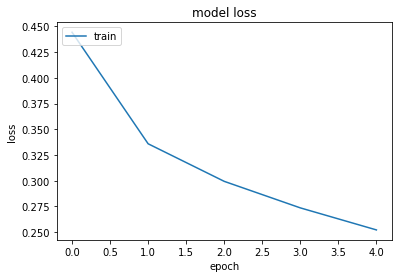

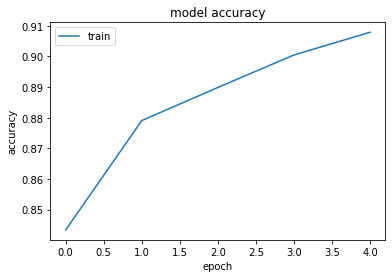

In [17]:
plot_history(history)

## using MinMax (0, 1)

In [18]:
# Reload the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()


minmax_scaler = MinMaxScaler(feature_range=(0, 1))
x_train = minmax_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = minmax_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

In [19]:
print(x_test[1].max())
print(x_test[1].min())

1.0
0.0


In [20]:
model = create_model()

# Train the model 
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4723 - accuracy: 0.8328
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3592 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3235 - accuracy: 0.8793
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2981 - accuracy: 0.8903
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2789 - accuracy: 0.8965


In [21]:
# Evaluate the model on unseen data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8794


[0.33885738253593445, 0.8794000148773193]

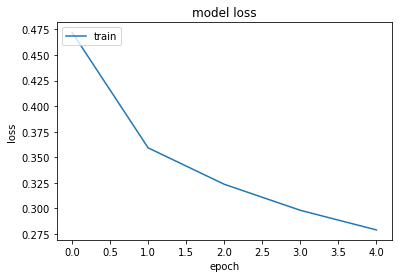

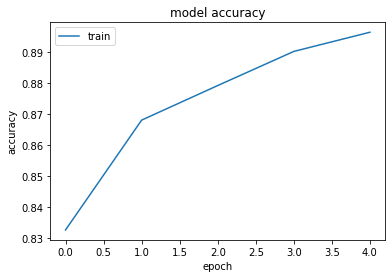

In [22]:
plot_history(history)

## using MinMax (-1, 1)

In [23]:
# Reload the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()


minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = minmax_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = minmax_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

In [24]:
print(x_test[1].max())
print(x_test[1].min())

1.0
-1.0


In [25]:
model = create_model()

# Train the model 
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4774 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3726 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3388 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2905 - accuracy: 0.8921


In [26]:
# Evaluate the model on unseen data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3653 - accuracy: 0.8723


[0.3653119206428528, 0.8723000288009644]

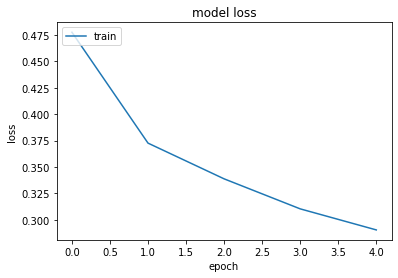

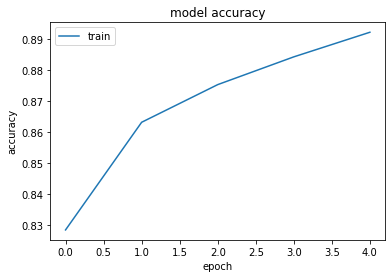

In [27]:
plot_history(history)